#NumPy avançado


---



### Organização interna do objeto ndarray

O ndarray do NumPy possibilita uma forma de interpretar um bloco
de dados homogêneo (seja contíguo ou em passos) como um objeto
array multidimensional. O tipo do dado, ou *dtype*, determina como os
dados são interpretados: como números de ponto flutuante, inteiros,
booleanos ou qualquer outro tipo que vimos antes.

Parte do que torna o ndarray flexível é o fato de todo objeto array
ser uma visão *em passos* (strided) de um bloco de dados. Talvez você
esteja se perguntando, por exemplo, como a visão do array *arr[::2,
::-1]* não implica nenhuma cópia de dados. O motivo está no fato de
o ndarray ser mais do que simplesmente uma porção de memória e
um dtype; ele também contém informações sobre “passos” (striding),
que permite que o array percorra a memória com tamanhos variados
de passos. De modo mais exato, o ndarray consiste internamente
das seguintes informações:

- um *ponteiro para os dados* – isto é, um bloco de dados em RAM ou
em um arquivo mapeado em memória;

- o *tipo do dado*, ou dtype, que descreve as células de tamanho fixo para os valores do array;

- uma tupla que informa o *formato* (shape) do array;

- uma tupla de passos (*strides*), isto é, inteiros que informam o
número de bytes para “pular” a fim de avançar um elemento em
uma dimensão.

Veja a Figura Abaixo que exibe uma representação simples da
organização interna de um ndarray.

Por exemplo, um array de 10 × 5 teria um formato (shape) igual a
*(10, 5)*:

In [1]:
import numpy as np

In [2]:
np.ones((10, 5)).shape

(10, 5)

Um array de 3 × 4 × 5 típico (ordem C) de valores *float64* (8 bytes)
tem passos de *(160, 40, 8)* (conhecer os passos pode ser útil, pois,
em geral, quanto maiores os passos em determinado eixo, mais
custoso será executar processamentos nesse eixo):

In [3]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

Embora seja raro um usuário típico do NumPy se interessar pelos
passos do array, eles são o ingrediente essencial na construção de
visualizações de arrays “sem cópias”. Os passos podem ser até
mesmo negativos, o que permite que o array ande “para trás” na
memória (esse seria, por exemplo, o caso de uma fatia como *obj\[::-1\]*
ou *obj\[:, ::-1\]*).

<div align="center">

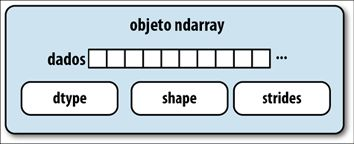

<h3>O objeto ndarray do NumPy.</h3>
</div>

### A hierarquia de dtypes do NumPy

Ocasionalmente, é possível que você tenha um código que necessite verificar se um array contém inteiros, números de ponto
flutuante, strings ou objetos Python. Considerando que há vários
tipos de números de ponto flutuante (de *float16* a *float128*), verificar se
o dtype está entre uma lista de tipos seria uma operação extensa.
Felizmente os dtypes têm superclasses como *np.integer* e *np.floating*,
que podem ser usadas em conjunto com a função *np.issubdtype*:


In [4]:
ints = np.ones(10, dtype=np.uint16)
ints

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [5]:
floats = np.ones(10, dtype=np.float32)
floats

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [6]:
np.issubdtype(ints.dtype, np.integer)

True

In [7]:
np.issubdtype(floats.dtype, np.floating)

True

Todas as classes-pais de um dtype específico podem ser vistas
chamando o método *mro* do tipo:

In [8]:
np.float16.mro()

[numpy.float16,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 object]

In [9]:
np.issubdtype(ints.dtype, np.number)

True

A maioria dos usuários do NumPy jamais terá que conhecer essas
informações; contudo, ocasionalmente, elas poderão ser úteis. Veja
a Figura Abaixo que mostra um diagrama da hierarquia de dtypes e os
relacionamentos entre as classes-pais e as subclasses.

<div align="center">

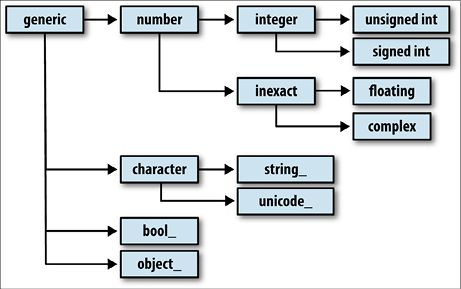

<h3>A hierarquia de classes dos dtypes do NumPy.</h3>
</div>


### Manipulação avançada de arrays

Há muitas maneiras de trabalhar com arrays além da indexação
sofisticada (fancy indexing), o fatiamento e a geração de
subconjuntos booleanos. Embora boa parte do trabalho pesado nas
aplicações de análise de dados seja tratada por funções de nível
mais alto no pandas, em algum momento, é possível que você
precise escrever um algoritmo de dados que não se encontre em
nenhuma das bibliotecas existentes.

### Redefinindo o formato de arrays

Em muitos casos, podemos converter um array de um formato para
outro sem copiar qualquer dado. Para isso, passe uma tupla
informando o novo formato para o método de instância *reshape* do
array. Por exemplo, suponha que tivéssemos um array
unidimensional de valores e quiséssemos reorganizá-lo na forma de
uma matriz:

In [10]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
#            linhas     colunas
arr.reshape((4,          2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

<div align="center">

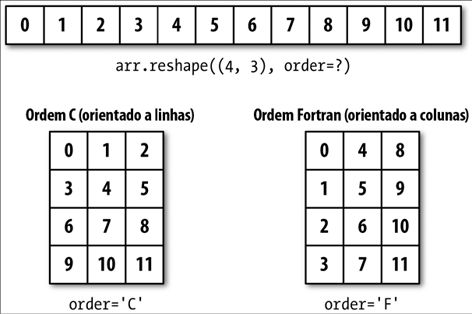

<h3>Redefinindo o formato na ordem C (orientado a linhas) ou na ordem Fortran (orientado a colunas).</h3>
</div>

Um array multidimensional também pode ter o formato redefinido:

In [12]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

Uma das dimensões do formato especificado pode ser –1, caso em
que o valor utilizado para essa dimensão será inferido a partir dos
dados:

In [13]:
arr = np.arange(15)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

Como o atributo *shape* de um array é uma tupla, esse pode ser
passado para *reshape* também:

In [15]:
other_arr = np.ones((3, 5))
other_arr

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [16]:
other_arr.shape

(3, 5)

In [17]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

A operação inversa de *reshape* de um formato unidimensional para
um formato de dimensões maiores em geral é conhecida como
*linearização* (flattening) ou *raveling*:

In [18]:
arr = np.arange(15).reshape((5, 3))

In [19]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [20]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

*ravel* não gerará uma cópia dos valores subjacentes se os valores no
resultado forem contíguos no array original. O método *flatten*
comporta-se como *ravel*, exceto pelo fato de que ele sempre
devolverá uma cópia dos dados:

In [21]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Ordem C versus ordem Fortran

O NumPy permite que você tenha controle e flexibilidade sobre o
layout de seus dados na memória. Por padrão, os arrays NumPy
são criados em uma ordem *orientada a linhas* (row major). Do ponto de
vista espacial, isso significa que, se você tiver um array de dados
bidimensional, os itens em cada linha do array serão armazenados
em posições de memória adjacentes. A alternativa à ordem
orientada a linhas é a ordem *orientada a colunas* (column major), que
significa que os valores em cada coluna de dados são armazenados
em posições de memória adjacentes.

Por motivos históricos, as ordens orientadas a linhas e orientadas a
colunas também são conhecidas como ordem C e ordem Fortran,
respectivamente. Na linguagem FORTRAN 77, todas as matrizes
são orientadas a colunas.

Funções como *reshape* e *ravel* aceitam um argumento *order* que
especifica a ordem em que os dados do array serão usados.
Geralmente ele é definido com *'C'* ou com *'F'* na maioria dos casos
(há também as opções *'A'* e *'K'*, menos usuais):

In [22]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

Redefinir o formato de arrays com mais de duas dimensões pode
ser um pouco difícil de entender. A principal
diferença entre a ordem C e a ordem Fortran está no modo como asdimensões são percorridas:

*Ordem C/orientada a linhas (row major)*

> As dimensões mais altas são percorridas *antes* (por exemplo, o eixo 1 antes de passar para o eixo 0).

*Ordem C/orientada a colunas (column major)*

> As dimensões mais altas são percorridas *depois* (por exemplo, o eixo 0 antes de passar para o eixo 1).

### Concatenando e separando arrays

*numpy.concatenate* recebe uma sequência (tupla, lista etc.) de arrays e
faz a sua junção na ordem, ao longo do eixo de entrada:


In [25]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])

In [26]:
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [27]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [28]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

Há algumas funções convenientes, como *vstack* e *hstack*, para os
tipos comuns de concatenação. As operações anteriores poderiam
ter sido expressas assim:

In [29]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [30]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

*split,* por outro lado, fatia um array em vários ao longo de um eixo: 

In [31]:
arr = np.random.randn(5, 2)
arr

array([[-1.52796106,  0.25252487],
       [ 0.36427625,  0.1529248 ],
       [ 0.11601537,  1.49383396],
       [ 0.62747296,  0.32524414],
       [-1.04046516, -0.74102562]])

In [32]:
first, second, third = np.split(arr, [1, 3])

In [33]:
first

array([[-1.52796106,  0.25252487]])

In [34]:
second

array([[0.36427625, 0.1529248 ],
       [0.11601537, 1.49383396]])

In [35]:
third

array([[ 0.62747296,  0.32524414],
       [-1.04046516, -0.74102562]])

O valor *\[1, 3\]* passado para *np.split* informa os índices nos quais o
array será separado em partes.

Veja a Tabela Abaixo que contém uma lista de todas as funções de
concatenação e de separação relevantes, algumas das quais são
oferecidas somente como alternativas convenientes à função de
propósito geral *concatenate*.

### Funções para concatenação de arrays

Função | Descrição
-------|-----------------------
**concatenate** | Função de caráter geral, concatena coleções de arrays ao longo
|de um eixo
**vstack**, **row_stack** | Empilha arrays ao longo das linhas (eixo 0)
**hstack** | Empilha arrays ao longo das colunas (eixo 1)
**column_stack** | Como hstack, porém converte arrays 1D para vetores de colunas
|2D antes
**dstack** | Empilha array em “profundidade” (ao longo do eixo 2)
**split** | Separa o array nos locais especificados ao longo de um eixo em
|particular
**hsplit/vsplit** | Funções convenientes para separação no eixo 0 e no eixo 1,
|respectivamente

### Auxiliares para empilhamento: r_ e c_
Há dois objetos especiais no namespace do NumPy, *r_* e *c_*, que
deixam o empilhamento de arrays mais conciso:

In [36]:
arr = np.arange(6)
arr

array([0, 1, 2, 3, 4, 5])

In [37]:
arr1 = arr.reshape((3, 2))
arr1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [38]:
arr2 = np.random.randn(3, 2)
arr2

array([[-0.68322257, -0.03390606],
       [-1.72716698, -0.03179687],
       [ 0.89576181,  0.85636347]])

In [39]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-0.68322257, -0.03390606],
       [-1.72716698, -0.03179687],
       [ 0.89576181,  0.85636347]])

In [40]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-0.68322257, -0.03390606,  3.        ],
       [-1.72716698, -0.03179687,  4.        ],
       [ 0.89576181,  0.85636347,  5.        ]])

In [41]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

### Repetindo elementos: tile e repeat

Duas ferramentas úteis para repetir ou replicar arrays a fim de gerar
arrays maiores são as funções *repeat* e *tile*. A função *repeat* replica
cada elemento de um array determinado número de vezes, gerando
um array maior:

In [42]:
arr = np.arange(3)

In [43]:
arr

array([0, 1, 2])

In [44]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

Por padrão, se você passar um inteiro, cada elemento será repetido
esse número de vezes. Se você passar um array de inteiros, cada
elemento será repetido um número diferente de vezes:

In [45]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

Arrays multidimensionais podem ter seus elementos repetidos ao
longo de um eixo em particular.

In [46]:
arr = np.random.randn(2, 2)
arr

array([[ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616]])

In [47]:
arr.repeat(2, axis=0)

array([[ 0.32718352,  0.37708997],
       [ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616],
       [ 1.79426137, -0.71753616]])

In [48]:
arr.repeat([2, 3], axis=0)

array([[ 0.32718352,  0.37708997],
       [ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616],
       [ 1.79426137, -0.71753616],
       [ 1.79426137, -0.71753616]])

In [49]:
arr.repeat([2, 3], axis=1)

array([[ 0.32718352,  0.32718352,  0.37708997,  0.37708997,  0.37708997],
       [ 1.79426137,  1.79426137, -0.71753616, -0.71753616, -0.71753616]])

*tile,* por outro lado, é um atalho para empilhar cópias de um array ao
longo de um eixo. Visualmente podemos pensar nele como
semelhante a “assentar azulejos”:

In [50]:
arr

array([[ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616]])

In [51]:
np.tile(arr, 2)

array([[ 0.32718352,  0.37708997,  0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616,  1.79426137, -0.71753616]])

In [52]:
np.tile(arr, (2, 1))

array([[ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616],
       [ 0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616]])

In [53]:
np.tile(arr, (3, 2))

array([[ 0.32718352,  0.37708997,  0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616,  1.79426137, -0.71753616],
       [ 0.32718352,  0.37708997,  0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616,  1.79426137, -0.71753616],
       [ 0.32718352,  0.37708997,  0.32718352,  0.37708997],
       [ 1.79426137, -0.71753616,  1.79426137, -0.71753616]])

### Equivalentes à indexação sofisticada: take e put

Uma maneira de obter e de definir subconjuntos de arrays é usar a
indexação sofisticada (fancy indexing) com arrays de inteiros:

In [54]:
arr = np.arange(10) * 100

In [55]:
arr

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [56]:
inds = [7, 1, 2, 6]

In [57]:
arr[inds]

array([700, 100, 200, 600])

Há métodos alternativos de ndarray que são úteis no caso especial
de fazer uma seleção somente em um único eixo:

In [58]:
arr.take(inds)

array([700, 100, 200, 600])

In [59]:
arr.put(inds, 42)

In [60]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [61]:
arr.put(inds, [40, 41, 42, 43])

In [62]:
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

Para usar *take* em outros eixos, podemos passar o argumento
nomeado *axis*:

In [63]:
inds = [2, 0, 2, 1]

In [64]:
arr = np.random.randn(2, 4)

In [65]:
arr

array([[-0.75149289,  1.0582073 ,  0.14357606,  0.25452893],
       [-0.93196612, -0.72588113,  0.29692917, -0.10218731]])

In [66]:
arr.take(inds, axis=1)

array([[ 0.14357606, -0.75149289,  0.14357606,  1.0582073 ],
       [ 0.29692917, -0.93196612,  0.29692917, -0.72588113]])

*put* não aceita um argumento *axis*, mas usa índices da versão
linearizada (unidimensional, em ordem C) do array. Assim, se
houver necessidade de definir elementos usando um array de
índices em outros eixos, em geral será mais fácil utilizar a indexação
sofisticada.

### Broadcasting

O *broadcasting* descreve o funcionamento da aritmética entre arrays
de formatos distintos. Pode ser um recurso eficaz, mas talvez cause
confusão, mesmo para os usuários experientes. O exemplo mais
simples de broadcasting ocorre quando combinamos um valor
escalar com um array:


In [67]:
arr = np.arange(5)

In [68]:
arr

array([0, 1, 2, 3, 4])

In [69]:
arr * 4

array([ 0,  4,  8, 12, 16])

Nesse caso, dizemos que fizemos o broadcast do valor escalar 4 para
todos os outros elementos na operação de multiplicação.

Por exemplo, podemos fazer a subtração da média de cada coluna
de um array. Nesse caso, é uma operação bem simples:

In [70]:
arr = np.random.randn(4, 3)
arr

array([[-0.27345101,  0.00321358,  0.99859443],
       [-2.07049454,  1.26091186,  0.01206992],
       [-0.64983364,  0.11056801, -0.45550178],
       [-1.14153163,  0.39435671, -1.30294781]])

In [71]:
arr.mean(axis=0)

array([-1.03382771,  0.44226254, -0.18694631])

In [72]:
demeaned = arr - arr.mean(0)

In [73]:
demeaned

array([[ 0.76037669, -0.43904896,  1.18554074],
       [-1.03666683,  0.81864932,  0.19901623],
       [ 0.38399406, -0.33169452, -0.26855547],
       [-0.10770393, -0.04790583, -1.1160015 ]])

In [74]:
demeaned.mean(0)

array([0.00000000e+00, 0.00000000e+00, 5.55111512e-17])

<div align="center">
<h2>A regra de broadcasting</h2>
</div>

Dois arrays serão compatíveis para broadcasting se, para cada *dimensão final*
(isto é, começando pelo final), os tamanhos dos eixos coincidirem ou se um
dos tamanhos for 1. O broadcasting será então efetuado nas dimensões
ausentes ou de tamanho 1.

<div align="center">

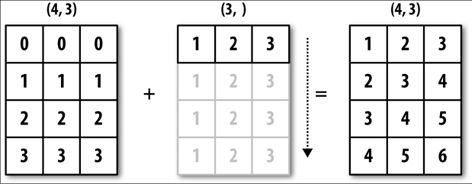

<h3>Broadcasting no eixo 0 com um array 1D.</h3>
</div>

Mesmo como um usuário experiente do NumPy, com frequência me
vejo tendo que fazer uma pausa e desenhando um diagrama
enquanto penso na regra de broadcasting. Considere o último
exemplo e suponha que quiséssemos, por outro lado, subtrair o
valor da média de cada linha. Como *arr.mean(0)* tem tamanho 3, ele é
compatível para broadcasting no eixo 0, pois a dimensão final em *arr*
é 3, e, desse modo, há uma coincidência. De acordo com as regras,
para fazer uma subtração no eixo 1 (isto é, subtrair a média da linha
de cada linha), o array menor deve ter a dimensão (4, 1):

In [75]:
arr 

array([[-0.27345101,  0.00321358,  0.99859443],
       [-2.07049454,  1.26091186,  0.01206992],
       [-0.64983364,  0.11056801, -0.45550178],
       [-1.14153163,  0.39435671, -1.30294781]])

In [76]:
row_means = arr.mean(1)

In [77]:
row_means.shape

(4,)

In [78]:
row_means.reshape((4, 1))

array([[ 0.24278566],
       [-0.26583759],
       [-0.33158914],
       [-0.68337425]])

In [79]:
demeaned = arr - row_means.reshape((4, 1))

In [80]:
demeaned

array([[-0.51623668, -0.23957209,  0.75580876],
       [-1.80465695,  1.52674944,  0.27790751],
       [-0.31824451,  0.44215715, -0.12391265],
       [-0.45815739,  1.07773095, -0.61957357]])

In [81]:
demeaned.mean(1)

array([ 0.00000000e+00,  7.40148683e-17, -1.85037171e-17,  7.40148683e-17])

<div align="center">

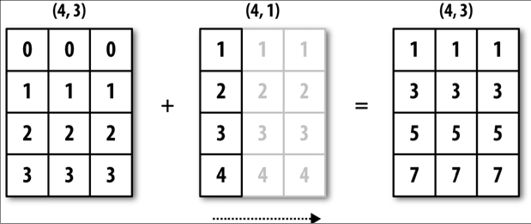

<h3>Broadcasting no eixo 1 de um array 2D.</h3>
</div>

<div align="center">

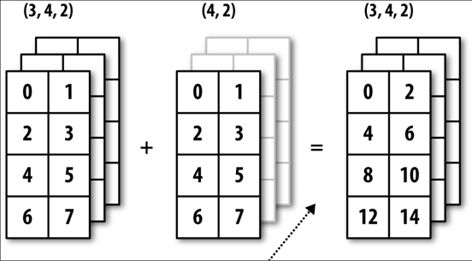

<h3>Broadcasting no eixo 0 de um array 3D.</h3>
</div>

### Broadcasting em outros eixos

O broadcasting com arrays de dimensões maiores pode parecer
mais complicado ainda, mas, na verdade, é uma questão de seguir
as regras. Se não as seguir, você obterá um erro como este:


```python
arr - arr.mean(1)
```


> \---------------------------------------------------------------------------
>
> **ValueError**                                Traceback (most recent call last)
>
> \<ipython-input-92-8b8ada26fac0\> in \<module\>()
>
> ----> 1 arr - arr.mean(1)
> 
> **ValueError**: operands could not be broadcast together with shapes (4,3) (4,)




É muito comum querer fazer uma operação aritmética com um array
de dimensões menores em eixos diferentes do eixo 0. De acordo
com a regra de broadcasting, as “dimensões do broadcast” devem
ser 1 no array menor. No exemplo da subtração da média mostrado
nesta seção, isso significou redimensionar as médias das linhas
para o formato *(4, 1)* em vez de *(4,)*:

In [82]:
arr - arr.mean(1).reshape((4, 1))

array([[-0.51623668, -0.23957209,  0.75580876],
       [-1.80465695,  1.52674944,  0.27790751],
       [-0.31824451,  0.44215715, -0.12391265],
       [-0.45815739,  1.07773095, -0.61957357]])

No caso tridimensional, o broadcasting em qualquer uma das três
dimensões é apenas uma questão de redefinir o formato dos dadospara que haja compatibilidade. A Figura Abaixo apresenta uma boa
visualização dos formatos necessários para fazer um broadcast em
cada eixo de um array tridimensional.

Assim, um problema comum é a necessidade de adicionar um novo
eixo de tamanho 1 especificamente com o intuito de fazer um
broadcasting. Usar *reshape* é uma opção, mas inserir um eixo exige a
construção de uma tupla indicando o novo formato. Com frequência,
esse pode ser um exercício maçante. Desse modo, os arrays
NumPy oferecem uma sintaxe especial para inserir novos eixos por
indexação. Usamos o atributo especial *np.newaxis*, junto com fatias
“completas” para inserir o novo eixo:

In [83]:
arr = np.zeros((4, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [84]:
arr_3d = arr[:, np.newaxis, :]

In [85]:
arr_3d.shape

(4, 1, 4)

In [86]:
arr_1d = np.random.normal(size=3)

In [87]:
arr_1d[:, np.newaxis]

array([[-0.15408579],
       [-0.88240249],
       [-1.56287865]])

In [88]:
arr_1d[np.newaxis, :]

array([[-0.15408579, -0.88240249, -1.56287865]])

<div align="center">

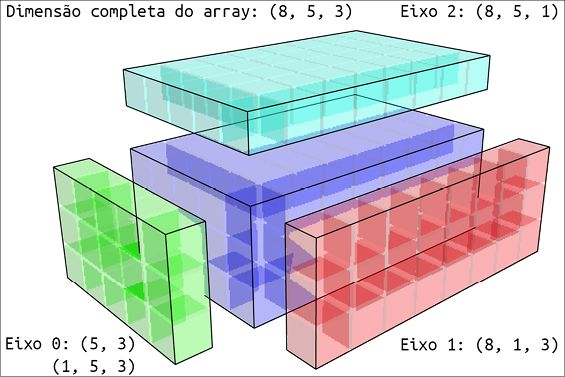

<h3>Formatos de arrays 2D compatíveis para broadcasting em um array 3D.</h3>
</div>

Assim, se tivéssemos um array tridimensional e quiséssemos
subtrair a média do eixo 2, por exemplo, teríamos que escrever o
código a seguir:

In [89]:
arr = np.random.randn(3, 4, 5)

In [90]:
depth_means = arr.mean(2)

In [91]:
depth_means

array([[-0.18694541, -0.02568041, -0.03286018, -0.00836841],
       [-0.3771018 , -0.29873804,  0.47011168, -1.14371281],
       [-0.13680399, -0.44685714, -0.7080289 , -0.68471893]])

In [92]:
depth_means.shape

(3, 4)

In [93]:
demeaned = arr - depth_means[:, :, np.newaxis]

In [94]:
demeaned.mean(2)

array([[ 0.00000000e+00,  2.22044605e-17, -4.44089210e-17,
        -1.24900090e-17],
       [ 2.22044605e-17, -9.99200722e-17,  6.66133815e-17,
         6.66133815e-17],
       [ 0.00000000e+00,  2.22044605e-17,  0.00000000e+00,
         4.44089210e-17]])

Você deve estar se perguntando se não há uma maneira de
generalizar a subtração da média de um eixo sem sacrificar o
desempenho. Há uma opção, mas ela exige um pouco de ginástica
na indexação:

In [95]:
def demean_axis(arr, axis=0):
  means = arr.mean(axis)

  indexer = [slice(None)] * arr.ndim
  indexer[axis] = np.newaxis
  return arr - means[indexer]

In [96]:
arr = np.random.randn(3, 4, 5)

In [97]:
demean_axis(arr, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[[ 2.24046402, -0.37496611, -1.48636762, -0.50626911,
          0.12713882],
        [-0.25776205,  0.81922222, -0.13222046, -0.38032607,
         -0.04891364],
        [ 0.56612486, -0.19843097, -1.3630928 , -0.08815821,
          1.08355713],
        [ 0.4119408 ,  0.9022039 , -2.33530905, -0.07985729,
          1.10102165]],

       [[ 0.46172803,  0.81386302,  0.28370274, -0.74185325,
         -0.81744055],
        [-0.29932362,  1.16073007, -1.72175103, -0.0210433 ,
          0.88138787],
        [ 0.56764593,  0.37889218, -0.06221172,  0.68551042,
         -1.56983681],
        [-0.13084436,  0.52165428, -0.73612273, -0.2483271 ,
          0.5936399 ]],

       [[-0.32187943, -0.05509238, -0.07023516,  0.05353636,
          0.39367062],
        [-1.15921782,  1.47839083, -0.31700858,  0.23289994,
         -0.23506437],
        [ 0.08462622,  1.14737247,  0.01758193, -1.33284229,
          0.08326168],
        [-0.05271663, -0.25269713,  1.29110528, -0.10293498,
         -0

### Definindo valores de array para broadcasting

A mesma regra de broadcasting que orienta as operações
aritméticas também se aplica à definição de valores com indexação
de arrays. Em um caso simples, podemos fazer algo como:

In [98]:
arr = np.zeros((4, 3))

In [99]:
arr[:] = 5

In [100]:
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

No entanto, se tivermos um array unidimensional de valores que
quiséssemos definir nas colunas do array, podemos fazer isso,
desde que o formato seja compatível:

In [101]:
col = np.array([1.27, -0.22, 0.45, 1.67])

In [102]:
arr[:] = col[:, np.newaxis]

In [103]:
arr

array([[ 1.27,  1.27,  1.27],
       [-0.22, -0.22, -0.22],
       [ 0.45,  0.45,  0.45],
       [ 1.67,  1.67,  1.67]])

In [104]:
arr[:2] = [[-1.37], [0.509]]

In [105]:
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.45 ,  0.45 ,  0.45 ],
       [ 1.67 ,  1.67 ,  1.67 ]])

### Usos avançados de ufuncs

### Métodos de instância de ufuncs

Cada uma das ufuncs binárias do NumPy tem métodos especiais
para executar determinados tipos de operações vetorizadas
especiais. Elas estão sintetizadas na Tabela Abaixo, mas apresentarei
alguns exemplos concretos para mostrar o seu funcionamento.

*reduce* aceita um único array e agrega seus valores, opcionalmente
ao longo de um eixo, realizando uma sequência de operações
binárias. Por exemplo, um modo alternativo de somar elementos em
um array é usar *np.add.reduce*:


In [106]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
np.add.reduce(arr)

45

In [108]:
arr.sum()

45

O valor inicial (0 para *add*) depende da ufunc. Se um eixo forpassado, a redução será feita ao longo desse eixo. Isso permite que
você responda a determinados tipos de perguntas de maneira
concisa. Como um exemplo menos trivial, podemos utilizar
*np.logical_and* para verificar se os valores em cada linha de um array
estão ordenados:

In [109]:
np.random.seed(12346)

In [111]:
arr = np.random.randn(5, 5)
arr

array([[ 5.22417588e-01,  1.06416038e-01,  1.02713364e-01,
        -1.08232609e-01,  5.48599204e-02],
       [ 1.96365303e-01, -1.93872621e-01, -1.45657748e+00,
         8.57447625e-01, -7.41575581e-01],
       [-7.80362529e-01, -1.06424500e-01,  5.93712721e-01,
        -1.28346227e+00,  4.77960478e-01],
       [ 1.29244703e+00,  1.51649202e-01, -1.46631428e+00,
        -1.43337431e+00, -9.77525491e-02],
       [ 1.23514614e+00,  1.35506346e-01, -7.05498872e-04,
         2.53602483e-01, -1.83245736e-01]])

In [113]:
arr[::2].sort(1)

In [114]:
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True]])

In [115]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True])

Observe que *logical_and.reduce* é equivalente ao método *all*.

está relacionado a *reduce*, assim como *cumsum* está
relacionado a *sum*. Ele gera um array de mesmo tamanho, com os
valores “acumulados” intermediários:

In [117]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [118]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

*outer* efetua um produto cruzado aos pares entre dois arrays:

In [119]:
arr = np.arange(3).repeat([1, 2, 2])
arr

array([0, 1, 1, 2, 2])

In [120]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

A saída de *outer* terá uma dimensão que será a soma das dimensões
das entradas:

In [121]:
x, y = np.random.randn(3, 4), np.random.randn(5)

In [122]:
x

array([[-0.7066303 ,  0.42676074, -0.27757707, -0.82828458],
       [-2.76283358,  0.98349424,  0.43775139, -0.84956379],
       [ 0.71876344,  0.73289771,  0.50470465, -0.7892592 ]])

In [123]:
y

array([0.5391877 , 1.29070685, 0.86761856, 0.41133011, 0.44593599])

In [124]:
result = np.subtract.outer(x, y)

In [125]:
result.shape

(3, 4, 5)

O último método, *reduceat*, faz uma “redução local”; essencialmente,
é uma operação *groupby* de array na qual fatias do array são
agregadas. Ele aceita uma sequência de “fronteiras de
compartimentos” (bin edges) que informam como separar e agregar
os valores:

In [127]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17])

Os resultados são as reduções (nesse caso, as somas) efetuadas
sobre *arr\[0:5\]* , *arr\[5:8\]* e *arr\[8:\]*. Como no caso dos demais métodos, é
possível passar um argumento com o eixo:

In [130]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
arr

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

In [131]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]])

### Métodos de ufunc

Método | Descrição
-------|------------------
**reduce(x)** | Agrega valores por meio de sucessivas aplicações da operação
**accumulate(x)** | Agrega valores preservando todas as agregações parciais
**reduceat(x, bins)** | Redução “local” ou “agrupar por”; reduz fatias contíguas de dados 
|para gerar um array com agregação
**outer(x, y)** | Aplica a operação a todos os pares de elementos em x e y; o
|array resultante tem o formato x.shape + y.shape

### Escrevendo novas ufuncs em Python

Há uma série de recursos para criar as próprias ufuncs NumPy. A
mais genérica consiste em usar a API C do NumPy, mas isso está
além do escopo deste livro. Nesta seção, veremos as ufuncs em
Python puro.

*numpy.frompyfunc* aceita uma função Python, junto com uma
especificação do número de entradas e de saídas. Por exemplo,
uma função simples que faça uma soma dos elementos poderia ser
especificada assim:

In [132]:
def add_el(x, y):
  return x + y

In [134]:
add_them = np.frompyfunc(add_el, 2, 1)
add_them

<ufunc '? (vectorized)'>

In [135]:
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

Funções criadas com *frompyfunc* sempre devolvem arrays de objetosPython, o que pode ser inconveniente. Felizmente há uma função
alternativa (porém com um pouco menos de recursos),
*numpy.vectorize*, que permite especificar o tipo da saída:

In [136]:
add_them = np.vectorize(add_them, otypes=[np.float64])

In [137]:
add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

Essas funções oferecem uma maneira de criar funções do tipo
ufunc, mas são muito lentas, pois exigem uma chamada de função
Python para calcular cada elemento, o que é muito mais lento que
os laços das ufuncs do NumPy baseadas em C:

In [138]:
arr = np.random.randn(10000)

In [139]:
%timeit add_them(arr, arr)

10 loops, best of 5: 21.6 ms per loop


In [140]:
%timeit np.add(arr, arr)

The slowest run took 11.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.93 µs per loop


### Arrays estruturados e de registros

Talvez você tenha percebido a essa altura que o ndarray é um
contêiner de dados *homogêneos*, isto é, ele representa um bloco de
memória em que cada elemento ocupa o mesmo número de bytes,
determinado pelo dtype. À primeira vista, poderia parecer que não
seria possível representar dados heterogêneos nem do tipo tabular.
Um array *estruturado* é um ndarray no qual cada elemento pode ser
pensado como uma representação de uma *struct* em C (daí o nome
“estruturado”) ou uma linha de uma tabela SQL com vários campos
nomeados:

In [144]:
dtype = [('x', np.float64), ('y', np.int32)]

In [145]:
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)

In [146]:
sarr

array([(1.5       ,  6), (3.14159265, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

Um modo típico é na forma de uma lista de tuplas com (*field_name*, *field_data_type*) . Agora os elementos do array serão objetos do tipo tupla cujos elementos podem ser acessados como um dicionário:

In [147]:
sarr[0]

(1.5, 6)

In [148]:
sarr[0]['y']

6

In [149]:
sarr['x']

array([1.5       , 3.14159265])

### dtypes aninhados e campos multidimensionais
Ao especificar um dtype estruturado, podemos
adicionalmente um formato (como um int ou uma tupla):

In [150]:
dtype = [('x', np.int64, 3), ('y', np.int32)]

In [151]:
arr = np.zeros(4, dtype=dtype)

In [152]:
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [155]:
arr[0]['x']

array([0, 0, 0])

De modo conveniente, acessar *arr['x']* devolve um array
bidimensional, em vez de unidimensional como nos exemplos
anteriores:

In [156]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Isso permite que você expresse estruturas aninhadas mais
complexas como um único bloco de memória em um array. Você
também pode aninhar dtypes a fim de criar estruturas mais
complexas. Eis um exemplo:

In [157]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]

In [159]:
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)

In [160]:
data['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [161]:
data['y']

array([5, 6], dtype=int32)

In [164]:
data['x']['a']

array([1., 3.])

### Mais sobre ordenação

In [165]:
arr = np.random.randn(6)

In [166]:
arr.sort()

In [167]:
arr

array([-1.06137462, -0.26822958, -0.18715572,  0.59545348,  0.91108374,
        1.33885804])

Quando ordenamos arrays in-place, lembre-se de que, se o array é
uma visualização de um ndarray diferente, o array original será
modificado:

In [169]:
arr = np.random.randn(3, 5)
arr

array([[-0.36360302, -0.13775933,  2.17773731, -0.47280687,  0.8356152 ],
       [-0.20885016,  0.23159352,  0.72798172, -1.3918432 ,  1.99558262],
       [-0.29812485,  1.20366758, -0.01576758,  0.74394881,  0.86879898]])

In [170]:
arr[:, 0].sort()
arr

array([[-0.36360302, -0.13775933,  2.17773731, -0.47280687,  0.8356152 ],
       [-0.29812485,  0.23159352,  0.72798172, -1.3918432 ,  1.99558262],
       [-0.20885016,  1.20366758, -0.01576758,  0.74394881,  0.86879898]])

Por outro lado, *numpy.sort* cria uma nova cópia ordenada de um array.
Exceto por isso, ele aceita os mesmos argumentos (por exemplo,
*kind*) que *ndarray.sort*:

In [172]:
arr = np.random.randn(5)
arr

array([-2.87915397e-04,  6.11682852e-01, -9.12103051e-02, -1.27990880e+00,
       -4.02301024e-02])

In [173]:
np.sort(arr)

array([-1.27990880e+00, -9.12103051e-02, -4.02301024e-02, -2.87915397e-04,
        6.11682852e-01])

In [174]:
arr

array([-2.87915397e-04,  6.11682852e-01, -9.12103051e-02, -1.27990880e+00,
       -4.02301024e-02])

Todos esses métodos de ordenação aceitam o eixo como
argumento para ordenar as seções de dados ao longo do eixo
especificado de modo independente:

In [175]:
arr = np.random.randn(3, 5)
arr

array([[-0.9698668 , -0.56260523,  1.11720457,  0.27911494, -1.11477496],
       [ 0.22661477,  0.34053082,  2.64388812, -1.62620593, -0.39760092],
       [-1.48205658,  1.06798843, -0.25198122, -0.93305739,  2.2639346 ]])

In [176]:
arr.sort(axis=1)

In [177]:
arr

array([[-1.11477496, -0.9698668 , -0.56260523,  0.27911494,  1.11720457],
       [-1.62620593, -0.39760092,  0.22661477,  0.34053082,  2.64388812],
       [-1.48205658, -0.93305739, -0.25198122,  1.06798843,  2.2639346 ]])

In [179]:
arr[:, ::-1]

array([[ 1.11720457,  0.27911494, -0.56260523, -0.9698668 , -1.11477496],
       [ 2.64388812,  0.34053082,  0.22661477, -0.39760092, -1.62620593],
       [ 2.2639346 ,  1.06798843, -0.25198122, -0.93305739, -1.48205658]])

### Ordenações indiretas: argsort e lexsort

In [180]:
values = np.array([5, 0, 1, 3, 2])

In [181]:
indexer = values.argsort()

In [182]:
indexer

array([1, 2, 4, 3, 0])

In [183]:
values[indexer]

array([0, 1, 2, 3, 5])

In [184]:
arr = np.random.randn(3, 5)

In [185]:
arr[0] = values

In [186]:
arr

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [ 0.58062675,  0.73687072, -0.19393023, -0.16143744, -0.1768192 ],
       [ 0.42201554,  0.11865768,  1.13518793,  1.43627776, -1.24869674]])

In [187]:
arr[:, arr[0].argsort()]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  5.        ],
       [ 0.73687072, -0.19393023, -0.1768192 , -0.16143744,  0.58062675],
       [ 0.11865768,  1.13518793, -1.24869674,  1.43627776,  0.42201554]])

In [188]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])

In [189]:
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

In [191]:
sorter = np.lexsort((first_name, last_name))

In [192]:
sorter

array([1, 2, 3, 0, 4])

In [193]:
for i in zip(last_name[sorter], first_name[sorter]):
  print(i)

('Arnold', 'Jane')
('Arnold', 'Steve')
('Jones', 'Bill')
('Jones', 'Bob')
('Walters', 'Barbara')


### Algoritmos de ordenação alternativos

In [194]:
values = np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])

In [195]:
key = np.array([2, 2, 1, 1, 1])

In [196]:
indexer = key.argsort(kind='mergesort')
indexer

array([2, 3, 4, 0, 1])

In [197]:
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

### Métodos para ordenação de arrays

Tipo | Velocidade | Estável | Espaço de trabalho | Pior caso
-----|------------|---------|--------------------|-----------
'quicksort' | 1 | Não | 0 | O(n^2)
'mergesort' | 2 | Sim | n / 2 | O(n log n)
'heapsort' | 3 | Não | 0 | O(n log n)

### Ordenando arrays parcialmente

Um dos objetivos da ordenação pode ser determinar o maior ou o
menor elemento de um array. O NumPy tem métodos otimizados,
*numpy.partition* e *np.argpartition*, para particionar um array em torno do k -
ésimo menor elemento:

In [198]:
np.random.seed(12345)

In [199]:
arr = np.random.randn(20)
arr

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057,
        1.39340583,  0.09290788,  0.28174615,  0.76902257,  1.24643474,
        1.00718936, -1.29622111,  0.27499163,  0.22891288,  1.35291684,
        0.88642934, -2.00163731, -0.37184254,  1.66902531, -0.43856974])

In [200]:
np.partition(arr, 3)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

Depois de chamar *partition(arr, 3)*, os três primeiros elementos do
resultado serão os três menores valores, em nenhuma ordem
específica. *numpy.argpartition*, de modo semelhante a *numpy.argsort*,
devolve os índices que reorganizam os dados na ordem equivalente:

In [201]:
indices = np.argpartition(arr, 3)

In [202]:
indices

array([16, 11,  3,  2, 17, 19,  0,  7,  8,  1, 10,  6, 12, 13, 14, 15,  5,
        4, 18,  9])

In [203]:
arr.take(indices)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

### numpy.searchsorted: encontrando elementos emum array ordenado

*searchsorted* é um método de array que faz uma busca binária em um
array ordenado, devolvendo a posição no array em que o valor
deveria ser inserido para mantê-lo ordenado:

In [204]:
arr = np.array([0, 1, 7, 12, 15])

In [205]:
arr.searchsorted(9)

3

In [206]:
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5])

In [207]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])

In [208]:
arr.searchsorted([0, 1])

array([0, 3])

In [209]:
arr.searchsorted([0, 1], side='right')

array([3, 7])

Como outra aplicação de *searchsorted*, suponha que tivéssemos um
array de valores entre 0 e 10.000, e um array separado de
“fronteiras de buckets” que quiséssemos usar para separar os dados
em compartimentos:

In [210]:
data = np.floor(np.random.uniform(0, 10000, size=50))

In [211]:
bins = np.array([0, 100, 1000, 5000, 10000])

In [212]:
data

array([9940., 6768., 7908., 1709.,  268., 8003., 9037.,  246., 4917.,
       5262., 5963.,  519., 8950., 7282., 8183., 5002., 8101.,  959.,
       2189., 2587., 4681., 4593., 7095., 1780., 5314., 1677., 7688.,
       9281., 6094., 1501., 4896., 3773., 8486., 9110., 3838., 3154.,
       5683., 1878., 1258., 6875., 7996., 5735., 9732., 6340., 8884.,
       4954., 3516., 7142., 5039., 2256.])

Para obter então rótulos informando a qual intervalo cada ponto de
dado pertence (em que 1 significaria o bucket *\[0, 100)* ), basta usar
*searchsorted*:

In [213]:
labels = bins.searchsorted(data)

In [214]:
labels

array([4, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3,
       4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3])

In [215]:
import pandas as pd

In [216]:
pd.Series(data).groupby(labels).mean()

2     498.000000
3    3064.277778
4    7389.035714
dtype: float64

### Escrevendo funções NumPy rápidas com o Numba
O Numba ( http://numba.pydata.org/ ) é um projeto de código aberto para
criação de funções rápidas para dados do tipo NumPy usando
CPUs, GPUs ou outros hardwares. Ele utiliza o Projeto LLVM
( http://llvm.org/ ) para traduzir código Python em código de máquina
compilado.

Para apresentar o Numba, vamos considerar uma função em Python
puro que calcule a expressão *(x - y).mean()* usando um laço *for*:

In [217]:
def mean_distance(x, y):
  nx = len(x)
  result = 0.0
  count = 0
  for i in range(nx):
    result += x[i] - y[i]
    count += 1
  return result / count

In [218]:
x = np.random.randn(10000000)
y = np.random.randn(10000000)

In [219]:
%timeit mean_distance(x, y)

1 loop, best of 5: 5.25 s per loop


In [220]:
%timeit (x - y).mean()

10 loops, best of 5: 27.8 ms per loop


A versão do NumPy é mais de 100 vezes mais rápida. Podemos
transformar essa função em uma função Numba compilada usando
a função *numba.jit*:

In [221]:
import numba as nb

In [222]:
numba_mean_distance = nb.jit(mean_distance)

In [223]:
@nb.jit
def mean_distance(x, y):
  nx = len(x)
  result = 0.0
  count = 0
  for i in range(nx):
    result += x[i] - y[i]
    count += 1
  return result / count

In [224]:
%timeit numba_mean_distance(x, y)

The slowest run took 16.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 18.3 ms per loop


O Numba não é capaz de compilar um código Python arbitrário, mas
aceita um subconjunto significativo de Python puro que é mais útil
para escrever algoritmos numéricos.

O Numba é uma biblioteca detalhada, com suporte para diferentes
tipos de hardware, modos de compilação e extensões de usuários.
Também é capaz de compilar um subconjunto substancial da API
Python do NumPy sem laços *for* explícitos. O Numba consegue
reconhecer construções que podem ser compiladas para código de
máquina, ao mesmo tempo em que substitui chamadas à API
CPython para funções às quais ele não sabe como compilar. A
função *jit* do Numba tem uma opção *nopython=True* que restringe o
código permitido a um código Python que possa ser compilado para
LLVM sem qualquer chamada da API C de Python. *jit(nopython=True)*
tem um alias mais conciso, *numba.njit*.
No exemplo anterior, poderíamos ter escrito o seguinte:

In [225]:
from numba import float64, njit

In [227]:
@njit(float64(float64[:], float64[:]))
def mean_distance2(x, y):
  return (x - y).mean()

In [228]:
%timeit mean_distance2(x, y)

10 loops, best of 5: 39.6 ms per loop


### Criando objetos numpy.ufunc personalizados com o Numba

A função *numba.vectorize* cria ufuncs NumPy personalizadas, que se
comportam como ufuncs embutidas. Vamos considerar uma
implementação Python de *numpy.add*:

In [229]:
from numba import vectorize

In [230]:
@vectorize
def nb_add(x, y):
  return x + y

In [231]:
x = np.arange(10)

In [232]:
nb_add(x, x)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [233]:
nb_add.accumulate(x, 0)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

### Operações avançadas de entrada e saída com arrays

fomos apresentados a *np.save* e a *np.load* para
armazenar arrays em formato binário em disco. Há uma série de
opções adicionais a serem consideradas para usos mais
sofisticados. Em particular, o mapeamento em memória tem a
vantagem extra de permitir que você trabalhe com conjuntos de
dados que não caibam em RAM.

### Arquivos mapeados em memória

Um arquivo *mapeado em memória* é um método para interagir com
dados binários em disco como se eles estivessem armazenados em
um array na memória. O NumPy implementa um objeto *memmap*, que
é do tipo ndarray, permitindo que pequenos segmentos de um
arquivo grande sejam lidos e escritos sem ler o array todo na
memória. Além disso, um *memmap* tem os mesmos métodos que um
array em memória e, desse modo, pode ser usado como substituto
em muitos algoritmos em que um ndarray seria esperado.

Para criar um novo mapeamento em memória, utilize a função
*np.memmap* e passe um path de arquivo, o dtype, o formato e o modo
do arquivo:

<div align="center">

<h3>O objeto ndarray do NumPy.</h3>
</div>